# Dijkstra's Algorithm

Dijkstra's Algorithm is a useful graph traversal algorithm developed by famed computer scientist Edsgar W. Dijkstra. In short, Dijkstra's algorithm is an algorithm that is used to find the shortest paths from the source vertex to different vertices in the graph. In order to do this, our function must take in the graph represented in the form of an adjacency list or matrix. Dijkstra's Algorithm will use the values in the list or the matrix to determine the shortest path between a source vertex and, in one manner of the implementation, every other vertex in the graph. Another common implementation of Dijkstra Algorithm is to determine the shortest path between a source vertex and an end vertex on the graph as opposed to every vertex. An application of using an end vertex is used in navigation systems.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from helper import draw_graph, clear_marks

# Pseudocode

The purpose of Dijkstra's Algorithm is to find the shortest path to any vertex in a graph from a start vertex. To determine what would classify as the shortest path from a source vertex to any other vertex, each edge is given a weight value. Using this, Dijkstra's Algorithm finds all the different paths from source vertex to a certain vertex on the graph and compares the added up weight values from the edges along the path. The path with the smallest value from the added weights is considered the shortest path. This is done to every other vertex as well, giving a shortest path from a source vertex to every other vertex in a graph.

There are two implementations of Dijkstra using different graph representations as input parameters. One variation involves passing in an adjacency list as a parameter. An adjacency list represents a graph by creating a list of sets of vertices where a pair indicates an edge between those two vertices. When a graph is directed, the ordering of the paired vertices matter. In another variation of the algorithm, we pass in an adjacency matrix as parameter instead of an adjacency list. An adjacency matrix is used to store the weights of an edge between two vertices. Each element within the matrix tells us whether 2 vertices are adjacent and the value given as the element is the weight. If 2 vertices are NOT adjacent then the value stored as the element is 0. The distance from a vertex to itself is also 0. We pass in a source vertex for both implementations of the algorithm. 

## Using an adjacency list
Here is the pseudcode for Dijkstra's Algorithm using an adjacency list.

```
function Dijkstra(Adjacency List, source):
    init distances for all nodes
        (0 for source / infinity for rest)
    init every node as unvisited
    
    while there are still unvisited nodes:
       get the unvisited node with the smallest distance
       mark it as visited
       for each unvisited neighbor of the min node:
           if the current distance of the neighbor is larger 
              than the distance of the min node +  the weight of the edge (min node, neighbor):
               set the the distance of the neighbor to the new distance
               mark min node as the previous node to the neighbor.

```


## Using an adjacency matrix

Here is the pseudocode for Dijkstra's Algorithm using an adjacency matrix.

```
function Dijkstra(Adjacency Matrix, source):
    distance at source vertex = 0
    
    for range of amount of vertices:
        for range of amount of vertices:
            if vertex was not visited and distance is less than infinity:
                save distance of specific vertex as minimum
                save the vertex           
        vertex saved is marked as visited
            
        for range of amount of vertices:
            if distance from saved vertex to current vertex is greater than zero and 
            vertex was not visited and 
            distance of current vertex > distance of minimum vertex + distance from saved vertex to current vertex:
                distance of current vertex = distance of minimum vertex + distance from saved vertex to current vertex

```

# Code for Dijkstra's Implementation

As specified above, one version of the algorithm takes in an adjacency matrix as a parameter while another application passes in an adjacency list. Another thing to note here is that both implementations find the path from a source vertex to __every__ other vertex in the graph. The outputs of both functions are identical as they output dictionaries. The keys in the dictionaries are *node dist* and *prev*. The first key stores the vertex in discussion, the *dist* key stores the distance from the vertex in discussion to the source vertex and the remaining key stores the previous vertex in the traversal in relation to the vertex in discussion. The distance is calculated by adding up the weights of the edges along the traversal. In an unweighted graph, an edge always as a weight of 1.0 while in a weighted graph, weight can be of any value.

In [2]:
def dijkstra_list(G, source):
    nodes = np.array([{'node': n, 'dist': np.inf, 'prev': 'Unreachable'} for n in G])
    nodes[source]['dist'] = 0
    nodes[source]['prev'] = None
    visited = np.array([False] * len(G))
    while ~visited.all():
        closest = min(nodes[~visited], key=lambda n: n.get('dist')).get('node')

        visited[closest] = True
        for neighbor in G.adj[closest]:
            if not visited[neighbor]:

                new_distance = nodes[closest]['dist'] + G.edges[(closest, neighbor)].get('weight', 1)

                if nodes[neighbor]['dist'] > new_distance:
                    nodes[neighbor]['dist'] = new_distance
                    nodes[neighbor]['prev'] = closest
    return nodes

In [3]:
def dijkstra_matrix(A, source): 
        nodes = np.array([{'node': n, 'dist': np.inf, 'prev': 'Unreachable'} for n in range(len(A))]) 
        nodes[source]['dist'] = 0
        nodes[source]['prev'] = None
        visited = [False] * len(A)
   
        for i in range(len(A)): 
        
            min = np.inf 
   
            for j in range(len(A)): 
                if nodes[j]['dist'] < min and visited[j] == False: 
                    min = nodes[j]['dist'] 
                    min_index = j
            j = min_index
            visited[j] = True
   
            for k in range(len(A)): 
                if (A[j][k] > 0) and (visited[k] == False) and (nodes[k]['dist'] > nodes[j]['dist'] + A[j][k]): 
                    nodes[k]['dist'] = nodes[j]['dist'] + A[j][k]
                    nodes[k]['prev'] = j
        return nodes

## Additional Functions

The previous implementations of Dijkstra's algorithm output the shortest path of a source vertex to __every__ other vertex in the graph. In order to print in a prettier format than a dictionary data type, we have created a function that prints the graph into a table, displaying the vertex, its distance from the source and the previous vertex in the traversal. In contrast to every vertex, there are implementations of Dijkstra's algorithm that print the path from a source vertex to a specified end vertex. We have added to accomadate this variation. We have also added a function that will take the output of the previously mentioned function (*shortest_path*) and displays the path from a source vertex to a specified end vertex using an arrow diagram.

In [4]:
def dijkstra_traversal_table(dijkstra_paths):                 
    print("Vertex\t Weight  Previous ") 
    print("-------------------------")
    for node in dijkstra_paths: 
        print(node['node'], "\t", node['dist'], "\t", node['prev']) 

def shortest_path(dijkstra_paths, target):
    """
    Returns the shortest path from the source node
    to the specified target node.
    """
    src = [dijkstra_path['node'] for dijkstra_path in dijkstra_paths if dijkstra_path['prev'] is None][0]
    original_target = target
    path = []
    while target != -1 and target is not None:
        path.append(target)
        target = dijkstra_paths[target]['prev']
    if target == -1:
        return src, original_target, []
    return src, original_target, path[::-1]

def print_path(src, target, shortest_path):
    if not shortest_path:
        print(f'No path from {src} to {target}')
        return
    for node in shortest_path[:-1]:
        print(node, '-->', end=' ')
    print(shortest_path[-1])

# Undirected Graph (Unweighted)

Dijkstra's algorithm in the most simplest form can be used to find the shortest path within an undirected graph. In this undirected graph, weights have not been specified. Since that is the case, if two vertices have an edge between them then the weight value will automatically be initalized to 1.0.  

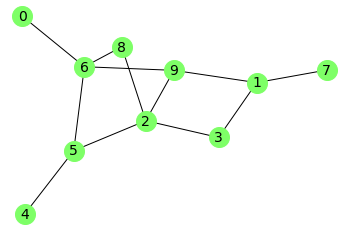

In [5]:
G = nx.erdos_renyi_graph(10, 0.3)
draw_graph(G)

### Adjacency List for Undirected Unweighted
First, we will implement the traversal by passing in the graph as an adjacency list.

In [6]:
output_list = dijkstra_list(G, 3)
dijkstra_traversal_table(output_list)

Vertex	 Weight  Previous 
-------------------------
0 	 4 	 6
1 	 1 	 3
2 	 1 	 3
3 	 0 	 None
4 	 3 	 5
5 	 2 	 2
6 	 3 	 5
7 	 2 	 1
8 	 2 	 2
9 	 2 	 1


### Adjacency Matrix for Undirected Unweighted
Below is the adjacency matrix for the graph. As one can see, this matrix is symmetrical along the diagonal. This is because the graph is undirected and if vertex A has a path to vertex B then therefore vertex B has a path to vertex A as well.

In [7]:
A = nx.to_numpy_array(G)
A

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0., 0., 0.]])

In [8]:
output_matrix = dijkstra_matrix(A, 3)
dijkstra_traversal_table(output_matrix)

Vertex	 Weight  Previous 
-------------------------
0 	 4.0 	 6
1 	 1.0 	 3
2 	 1.0 	 3
3 	 0 	 None
4 	 3.0 	 5
5 	 2.0 	 2
6 	 3.0 	 5
7 	 2.0 	 1
8 	 2.0 	 2
9 	 2.0 	 1


### Printing Paths

We can also visualize the path from a source vertex to a specified vertex using the *print_path* function created above. 

In [9]:
src, target, path_3_to_9 = shortest_path(output_list, 9)
print_path(src, target, path_3_to_9)

3 --> 1 --> 9


This can be done using the matrix output as well (since the matrix and list functions both output the same thing).

In [10]:
src, target, path_3_to_9 = shortest_path(output_matrix, 9)
print_path(src, target, path_3_to_9)

3 --> 1 --> 9


# Directed Graph (Unweighted)

Here is Dijkstra's Algorithm implemented on a directed graph with uninitialized weights. Since direction is important here, if the source vertex cannot reach a certain vertex within the graph, *inf* (i.e. infinity) will be printed as the distance and "unreachable" will be printed as the previous vertex.

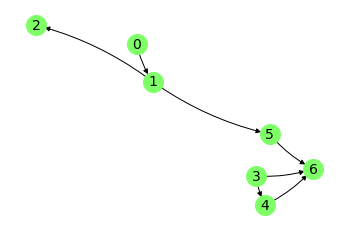

In [11]:
G = nx.DiGraph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(3, 4)
G.add_edge(1, 5)
G.add_edge(3, 6)
G.add_edge(4, 6)
G.add_edge(5, 6)
draw_graph(G)

### Adjacency List for Directed Unweighted

In [12]:
output_list = dijkstra_list(G, 0)
dijkstra_traversal_table(output_list)

Vertex	 Weight  Previous 
-------------------------
0 	 0 	 None
1 	 1 	 0
2 	 2 	 1
3 	 inf 	 Unreachable
4 	 inf 	 Unreachable
5 	 2 	 1
6 	 3 	 5


### Adjacency Matrix for Directed Unweighted

One thing to notice here is the matrix is NOT symmetrical along the diagonal. This is an indication of a directed graph.

In [13]:
A = nx.to_numpy_array(G)
A

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [14]:
output_matrix = dijkstra_matrix(A, 0)
dijkstra_traversal_table(output_matrix)

Vertex	 Weight  Previous 
-------------------------
0 	 0 	 None
1 	 1.0 	 0
2 	 2.0 	 1
3 	 inf 	 Unreachable
4 	 inf 	 Unreachable
5 	 2.0 	 1
6 	 3.0 	 5


### Printing Paths

In [15]:
src, target, path_0_to_6 = shortest_path(output_list, 6)
print_path(src, target, path_0_to_6)

0 --> 1 --> 5 --> 6


## Undirected Graph with Initialized Weights

In the graph below, weights have been initialized for the graph. Instead of adding the value 1 for each edge along a traversal, we add the values specified as weights. 

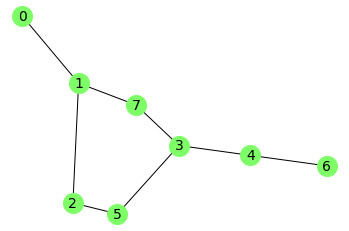

In [34]:
G = nx.Graph()
G.add_edge(0, 1,weight=2.0)
G.add_edge(1, 2,weight=1.0)
G.add_edge(3, 4,weight=4.0)
G.add_edge(2, 5,weight=6.0)
G.add_edge(4, 6,weight=2.0)
G.add_edge(3, 7,weight=7.0)
G.add_edge(3, 5,weight=2.0)
G.add_edge(7, 1,weight=5.0)
draw_graph(G)

These are the weights of the edges between two vertices.

In [38]:
for i in list(G.edges(data=True)):
    print(i)

(0, 1, {'weight': 2.0})
(1, 2, {'weight': 1.0})
(1, 7, {'weight': 5.0})
(2, 5, {'weight': 6.0})
(3, 4, {'weight': 4.0})
(3, 7, {'weight': 7.0})
(3, 5, {'weight': 2.0})
(4, 6, {'weight': 2.0})


### Adjacency List for Undirected Weighted

In [39]:
output_list = dijkstra_list(G, 1)
dijkstra_traversal_table(output_list)

Vertex	 Weight  Previous 
-------------------------
0 	 2.0 	 1
1 	 0 	 None
2 	 1.0 	 1
3 	 9.0 	 5
4 	 13.0 	 3
5 	 7.0 	 2
6 	 15.0 	 4
7 	 5.0 	 1


### Adjacency Matrix for Undirected Weighted

In [40]:
A = nx.to_numpy_array(G)
A

array([[0., 2., 0., 0., 0., 0., 0., 0.],
       [2., 0., 1., 0., 0., 0., 0., 5.],
       [0., 1., 0., 0., 0., 6., 0., 0.],
       [0., 0., 0., 0., 4., 2., 0., 7.],
       [0., 0., 0., 4., 0., 0., 2., 0.],
       [0., 0., 6., 2., 0., 0., 0., 0.],
       [0., 0., 0., 0., 2., 0., 0., 0.],
       [0., 5., 0., 7., 0., 0., 0., 0.]])

In [42]:
output_matrix = dijkstra_matrix(A, 1)
dijkstra_traversal_table(output_matrix)

Vertex	 Weight  Previous 
-------------------------
0 	 2.0 	 1
1 	 0 	 None
2 	 1.0 	 1
3 	 9.0 	 5
4 	 13.0 	 3
5 	 7.0 	 2
6 	 15.0 	 4
7 	 5.0 	 1


### Printing Paths

In [43]:
src, target, path_1_to_4 = shortest_path(output_list, 4)
print_path(src, target, path_1_to_4)

1 --> 2 --> 5 --> 3 --> 4


## Directed Graph with Initialized Weights

In this directed graph, weights have been initialized for each path. 

In [ ]:
G = nx.DiGraph()
G.add_edge(0, 1,weight=3.0)
G.add_edge(1, 2,weight=1.0)
G.add_edge(3, 4,weight=4.0)
G.add_edge(1, 5,weight=2.0)
G.add_edge(3, 6,weight=8.0)
G.add_edge(4, 6,weight=3.0)
G.add_edge(5, 6,weight=2.0)
draw_graph(G)


<Here are the weights for the edges in the directed graph. 

In [ ]:
for i in list(G.edges(data=True)):
    print(i)

In [ ]:
A = nx.to_numpy_array(G)
print(A)

### Results

In [ ]:
dijkstra_matrix(A, 0)